In [56]:
#Importamos bibliotecas
import pandas as pd
import numpy as np
from matplotlib import pyplot as plot
import seaborn as sns

In [57]:
data = pd.read_excel(r"./demandaHistorica.xlsx")
data.head()

,anio,mes,agente_nemo,agente_descripcion,tipo_agente,region,provincia,categoria_area,categoria_demanda,tarifa,categoria_tarifa,demanda_MWh,indice_tiempo
0,2012,1,AARGTAOY,AEROP ARG 2000 - Aeroparque,GU,GRAN BS.AS.,BUENOS AIRES,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,2222628,2012-01-01
1,2012,1,ACARQQ3Y,ASOC.COOP.ARG. - Quequén,GU,BUENOS AIRES,BUENOS AIRES,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,536858,2012-01-01
2,2012,1,ACARSLSY,ASOC.COOP.ARG. - San Lorenzo,GU,LITORAL,SANTA FE,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,336297,2012-01-01
3,2012,1,ACINROSY,ACINDAR ROSARIO EX-NAVARRO,GU,LITORAL,SANTA FE,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,601066,2012-01-01
4,2012,1,ACINTBOY,ACINDAR PTA. TABLADA,GU,GRAN BS.AS.,BUENOS AIRES,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,3076618,2012-01-01


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122263 entries, 0 to 122262
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   anio                122263 non-null  int64         
 1   mes                 122263 non-null  int64         
 2   agente_nemo         122263 non-null  object        
 3   agente_descripcion  122263 non-null  object        
 4   tipo_agente         122263 non-null  object        
 5   region              122263 non-null  object        
 6   provincia           122263 non-null  object        
 7   categoria_area      122263 non-null  object        
 8   categoria_demanda   122263 non-null  object        
 9   tarifa              122263 non-null  object        
 10  categoria_tarifa    122263 non-null  object        
 11  demanda_MWh         122263 non-null  int64         
 12  indice_tiempo       122263 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3

In [59]:
data.describe()

,anio,mes,demanda_MWh
count,122263.000000,122263.000000,1.222630e+05
mean,2015.434776,6.373637,8.560247e+06
std,2.201872,3.469122,3.821235e+07
min,2012.000000,1.000000,-2.537772e+07
25%,2014.000000,3.000000,2.344730e+05
50%,2015.000000,6.000000,1.101442e+06
75%,2017.000000,9.000000,3.915329e+06
max,2020.000000,12.000000,1.572308e+09


In [60]:
data.shape

(122263, 13)

# Histograma y Scatterplot de demanda por mes

In [61]:
#Generación del dataframe

data2 = data.groupby('indice_tiempo').demanda_MWh.sum()
data2 = data2.to_frame().reset_index()
data2['indice_tiempo'] = pd.to_datetime(data2['indice_tiempo'])

# Create a new column for year-month
data2['YearMonth'] = data2['indice_tiempo'].dt.to_period('M')

data2.drop('indice_tiempo', axis=1, inplace=True)

# Reorder columns
data2 = data2[['YearMonth', 'demanda_MWh']]

# Group by 'YearMonth' and calculate some aggregate function (e.g., sum)
result = data2.groupby('YearMonth')['demanda_MWh'].sum()
result = result.to_frame().reset_index()

result


,YearMonth,demanda_MWh
0,2012-01,9957519285
1,2012-02,9501232118
2,2012-03,8769373773
3,2012-04,8353950602
4,2012-05,9200213094
...,...,...
93,2019-10,9835428445
94,2019-11,10105629895
95,2019-12,9680243683
96,2020-01,10440000393


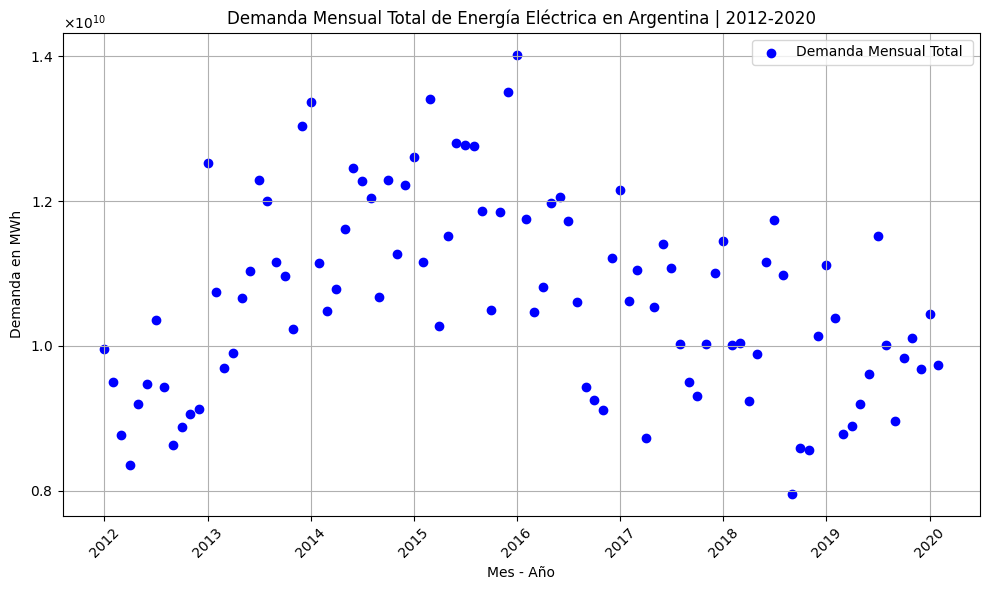

In [62]:
# Convertir la columna de fecha de Period a datetime
result['YearMonth'] = pd.to_datetime(result['YearMonth'].astype(str))

# Crear el scatter plot
plot.figure(figsize=(10, 6))  # Tamaño de la figura
plot.scatter(result['YearMonth'], result['demanda_MWh'], color='blue', marker='o', label='Demanda Mensual Total ')

# Personalizar el gráfico
plot.title('Demanda Mensual Total de Energía Eléctrica en Argentina | 2012-2020')
plot.xlabel('Mes - Año')
plot.ylabel('Demanda en MWh')
plot.grid(True)

# Rotar las etiquetas del eje x para que se vean mejor
plot.xticks(rotation=45)

# Cambiar las etiquetas del eje y para mostrar números completos
ax = plot.gca()
ax.yaxis.set_major_formatter(plot.ScalarFormatter(useMathText=True, useOffset=False))

# Establecer el número máximo de etiquetas en el eje y (ajústalo según tus preferencias)
ax.locator_params(axis='y', nbins=5)

# Mostrar una leyenda
plot.legend()

# Mostrar el gráfico
plot.tight_layout()  # Para ajustar el diseño y evitar cortes en etiquetas
plot.show()

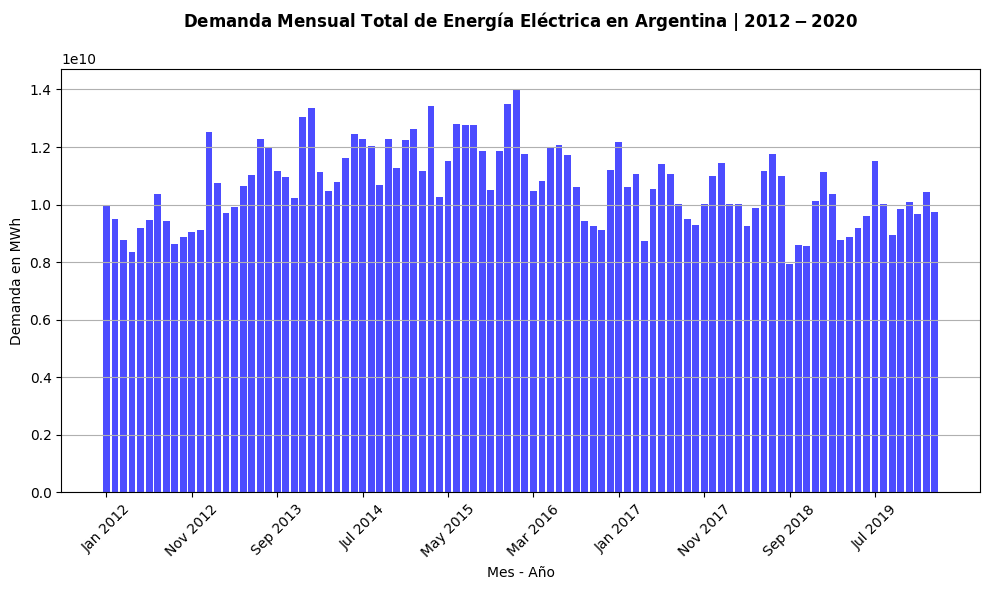

In [63]:
# Extraer el año y el mes de la columna 'YearMonth'
result['Year'] = pd.to_datetime(result['YearMonth']).dt.year
result['Month'] = pd.to_datetime(result['YearMonth']).dt.strftime('%b %Y')

# Crear el histograma
plot.figure(figsize=(10, 6))
plot.bar(result['Month'], result['demanda_MWh'], color='blue', alpha=0.7)

# Personalizar el gráfico
plot.title(r'$\mathbf{Demanda\ Mensual\ Total\ de\ Energía\ Eléctrica\ en\ Argentina\ | \ 2012-2020}$', pad=30)
plot.xlabel('Mes - Año')
plot.ylabel('Demanda en MWh')
plot.grid(axis='y')

# Rotar las etiquetas del eje x para una mejor legibilidad
# Reducir la cantidad de etiquetas en el eje X
tick_spacing = 10  # Espacio entre etiquetas en el eje X
plot.xticks(np.arange(0, len(result.index), tick_spacing), result['Month'][::tick_spacing], rotation=45)


# Mostrar el gráfico
plot.tight_layout()
plot.show()

# Demanda total por provincia

In [64]:
#Generación del dataframe

demandaPorProvincia = data.groupby('provincia').demanda_MWh.sum()
demandaPorProvincia = demandaPorProvincia.to_frame().reset_index()
demandaPorProvincia


,provincia,demanda_MWh
0,BUENOS AIRES,525329463664
1,CATAMARCA,14342206314
2,CHACO,20969548984
3,CHUBUT,31138422804
4,CORDOBA,77473443290
5,CORRIENTES,21780866787
6,ENTRE RIOS,29024361544
7,FORMOSA,13943632611
8,JUJUY,8446205200
9,LA PAMPA,7204269426


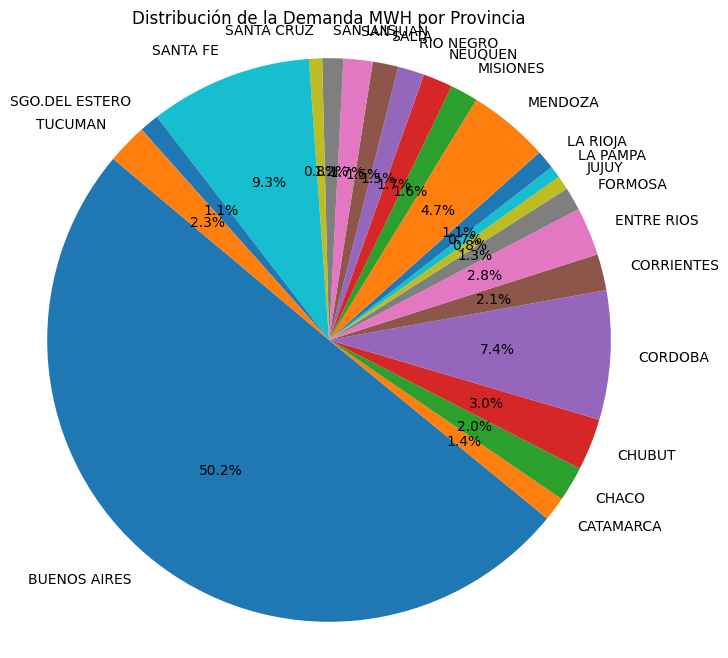

In [65]:
# Crear el gráfico de tipo "pie chart"
plot.figure(figsize=(8, 8))
plot.pie(demandaPorProvincia['demanda_MWh'], labels=demandaPorProvincia['provincia'], autopct='%1.1f%%', startangle=140)
plot.title('Distribución de la Demanda MWH por Provincia')

# Mostrar el gráfico
plot.axis('equal')  # Para asegurarse de que el gráfico sea un círculo
plot.show()

C:\Users\manue\AppData\Local\Temp\ipykernel_2848\3586981422.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  demandaPorProvincia_relevante = demandaPorProvincia_relevante.append(otros, ignore_index=True)


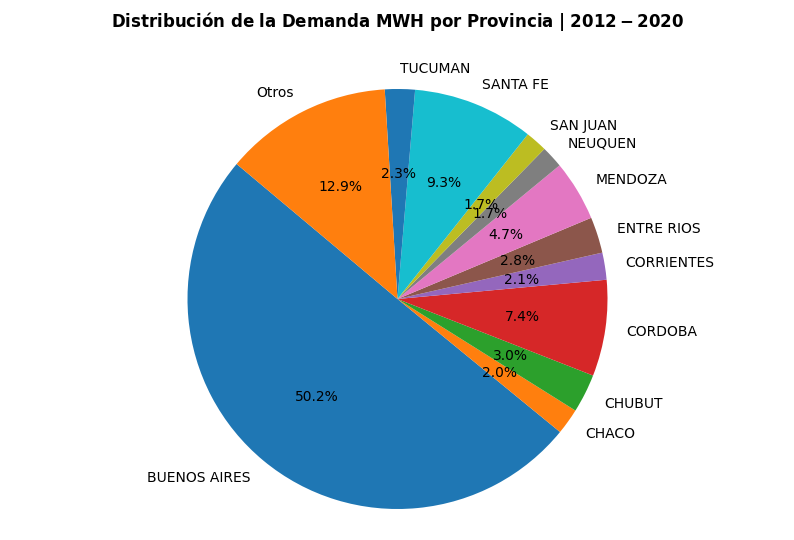

In [66]:
#Algunos parámetros para personalizar el gráfico

# Parámetro para agrupar provincias menos relevantes bajo "Otros"
umbral = 17500000000  # Define un umbral para agrupar provincias con demanda menor a este valor

# Crear un DataFrame con las provincias relevantes y sumar las demás bajo "Otros"
demandaPorProvincia_relevante = demandaPorProvincia[demandaPorProvincia['demanda_MWh'] >= umbral]
otros = demandaPorProvincia[demandaPorProvincia['demanda_MWh'] < umbral].sum()
otros['provincia'] = 'Otros'
demandaPorProvincia_relevante = demandaPorProvincia_relevante.append(otros, ignore_index=True)
demandaPorProvincia_relevante

# Crear el gráfico de tipo "pie chart" con las provincias relevantes
plot.figure(figsize=(10, 6))
plot.pie(demandaPorProvincia_relevante['demanda_MWh'], labels=demandaPorProvincia_relevante['provincia'], autopct='%1.1f%%', startangle=140)
plot.title(r'$\mathbf{Distribución\ de\ la\ Demanda\ MWH\ por\ Provincia\ | \ 2012-2020}$', pad=30)

# Mostrar el gráfico
plot.axis('equal')
plot.show()

# Demanda total por región

In [67]:
#Generación del dataframe

demandaPorRegion = data.groupby('region').demanda_MWh.sum()
demandaPorRegion = demandaPorRegion.to_frame().reset_index()
demandaPorRegion

,region,demanda_MWh
0,BUENOS AIRES,126157827290
1,CENTRO,90036147875
2,COMAHUE,40665348689
3,CUYO,66257402467
4,GRAN BS.AS.,399170642675
5,LITORAL,126533277673
6,NORESTE,73360172220
7,NOROESTE,85256376863
8,PATAGONICA,39164309556


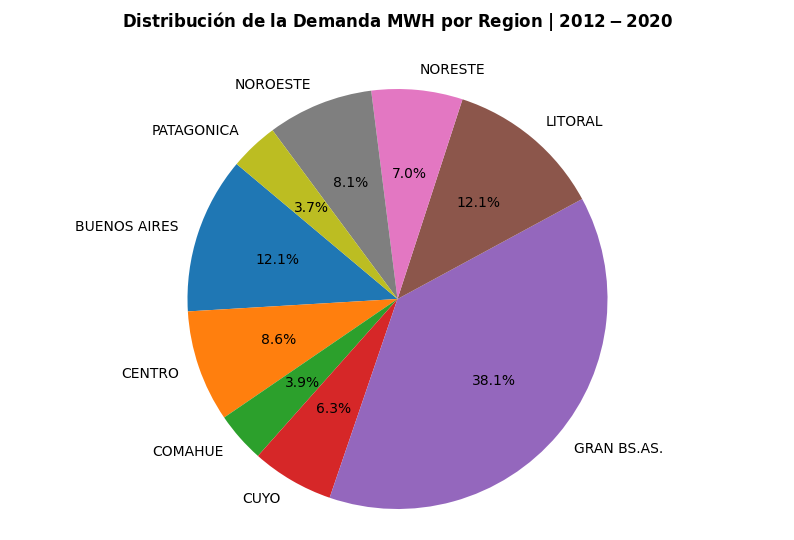

In [68]:
# Crear el gráfico de tipo "pie chart"
plot.figure(figsize=(10, 6))
plot.pie(demandaPorRegion['demanda_MWh'], labels=demandaPorRegion['region'], autopct='%1.1f%%', startangle=140)
plot.title(r'$\mathbf{Distribución\ de\ la\ Demanda\ MWH\ por\ Region\ | \ 2012-2020}$', pad=30)
# Mostrar el gráfico
plot.axis('equal')  # Para asegurarse de que el gráfico sea un círculo
plot.show()

# Demanda por tipo de usuario

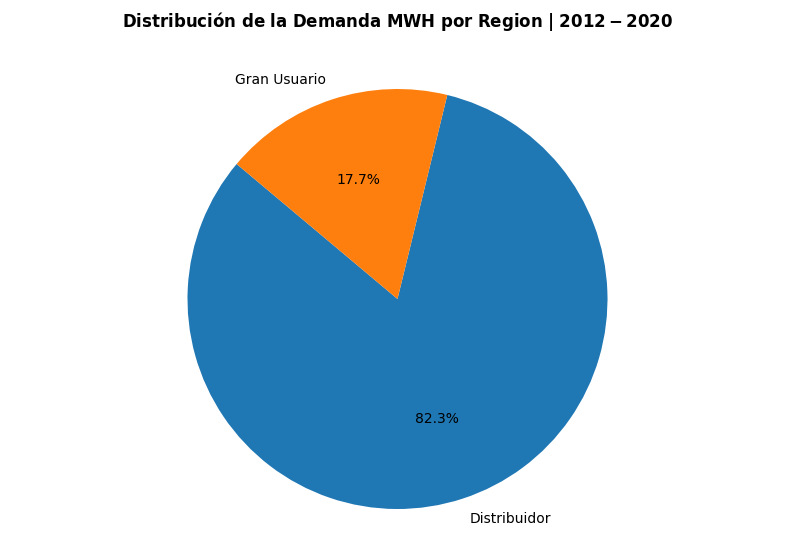

In [71]:
#Generación del dataframe

demandaPorTdu = data.groupby('categoria_demanda').demanda_MWh.sum()
demandaPorTdu = demandaPorTdu.to_frame().reset_index()
# Crear el gráfico de tipo "pie chart"
plot.figure(figsize=(10, 6))
plot.pie(demandaPorTdu['demanda_MWh'], labels=demandaPorTdu['categoria_demanda'], autopct='%1.1f%%', startangle=140)
plot.title(r'$\mathbf{Distribución\ de\ la\ Demanda\ MWH\ por\ Region\ | \ 2012-2020}$', pad=30)
# Mostrar el gráfico
plot.axis('equal')  # Para asegurarse de que el gráfico sea un círculo
plot.show()

In [73]:
data.columns

Index(['anio', 'mes', 'agente_nemo', 'agente_descripcion', 'tipo_agente',
       'region', 'provincia', 'categoria_area', 'categoria_demanda', 'tarifa',
       'categoria_tarifa', 'demanda_MWh', 'indice_tiempo'],
      dtype='object')

In [113]:
grupo = data.groupby(['region', 'categoria_demanda'])['demanda_MWh'].sum().unstack()
grupo = grupo.sort_values(by='Gran Usuario', ascending=False)
grupo = grupo[['Gran Usuario', 'Distribuidor']]
grupo                                    

categoria_demanda,Gran Usuario,Distribuidor
region,,
GRAN BS.AS.,60218596420,338952046255
BUENOS AIRES,34808035804,91349791486
PATAGONICA,22962941796,16201367760
LITORAL,22625193118,103908084555
CUYO,13482612537,52774789930
NOROESTE,12914301552,72342075311
CENTRO,8291256149,81744891726
COMAHUE,7803566172,32861782517
NORESTE,2135197065,71224975155


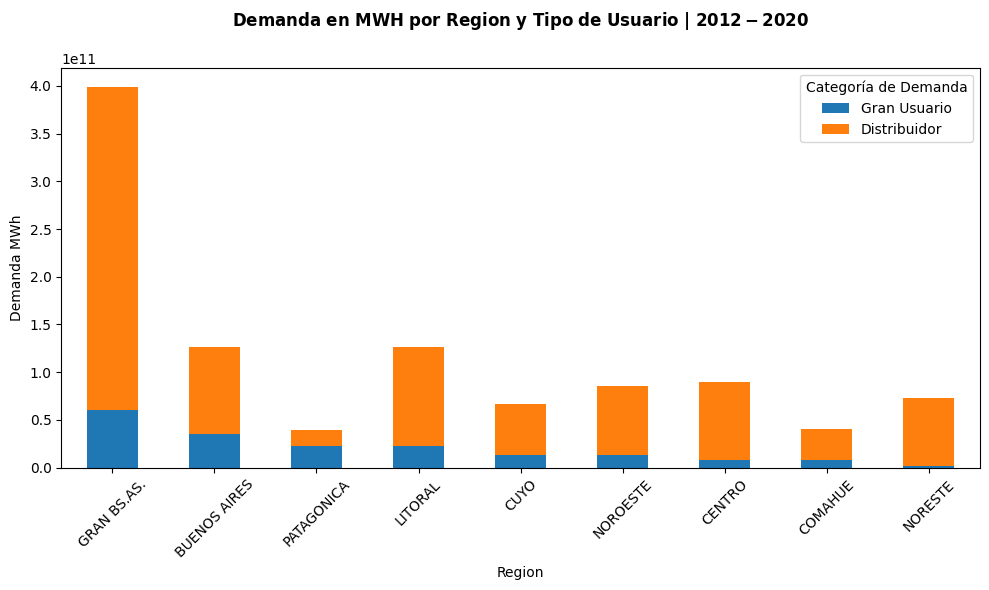

In [115]:
# Crear un gráfico de barras apiladas
ax = grupo.plot(kind='bar', stacked=True, figsize=(10, 6))

# Personalizar el gráfico
plot.title(r'$\mathbf{Demanda\ en \ MWH\ por\ Region\ y \ Tipo \ de \ Usuario \ | \ 2012-2020}$', pad=30)
plot.xlabel('Región')
plot.ylabel('Demanda MWh')
plot.xticks(rotation=45)

# Mostrar el gráfico
plot.legend(title='Categoría de Demanda')
plot.tight_layout()
plot.show()

In [104]:
df = data
demanda_total_por_region = df.groupby('region')['demanda_MWh'].sum()
df['proporcion'] = df.groupby('region')['demanda_MWh'].transform(lambda x: x / x.sum())
proporciones = df.groupby(['region', 'categoria_demanda'])['proporcion'].sum().unstack().fillna(0)
proporciones = proporciones.sort_values(by='Gran Usuario', ascending=False)
proporciones = proporciones[['Gran Usuario', 'Distribuidor']]
proporciones

categoria_demanda,Gran Usuario,Distribuidor
region,,
PATAGONICA,0.586323,0.413677
BUENOS AIRES,0.275909,0.724091
CUYO,0.203488,0.796512
COMAHUE,0.191897,0.808103
LITORAL,0.178808,0.821192
NOROESTE,0.151476,0.848524
GRAN BS.AS.,0.150859,0.849141
CENTRO,0.092088,0.907912
NORESTE,0.029106,0.970894


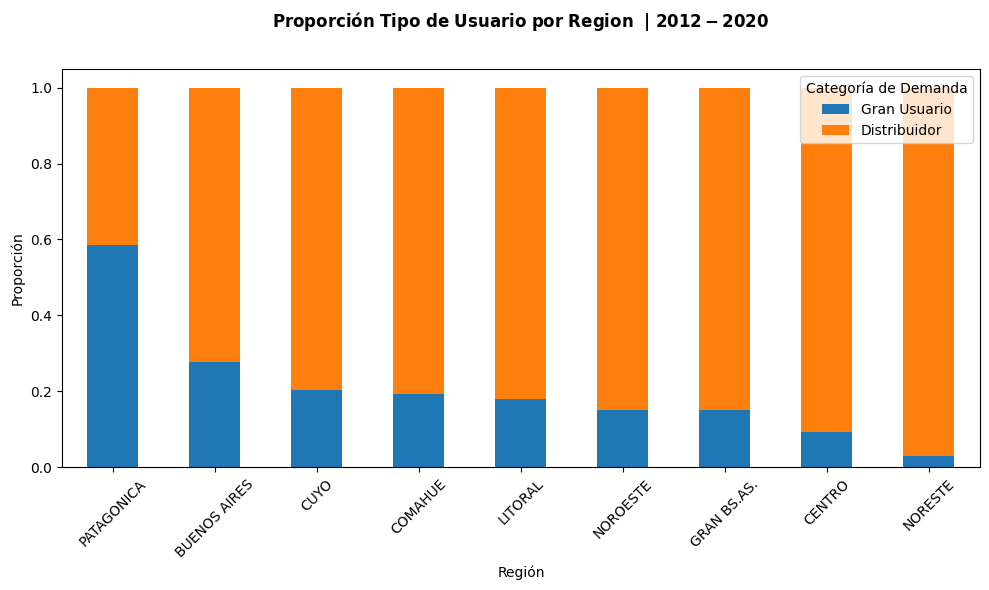

In [118]:
# Crear un gráfico de barras apiladas
ax = proporciones.plot(kind='bar', stacked=True, figsize=(10, 6))

# Personalizar el gráfico
plot.title(r'$\mathbf{Proporción\ Tipo \ de \ Usuario  \ por\ Region\ \ | \ 2012-2020}$', pad=30)
plot.xlabel('Región')
plot.ylabel('Proporción')
plot.xticks(rotation=45)

# Mostrar el gráfico
plot.legend(title='Categoría de Demanda')
plot.tight_layout()
plot.show()